# Agenda:

# Which customers are more likely to adopt or respond to new schemes put by Banks?

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (‘yes’) or not (‘no’) subscribed.

You can download dataset with this link


https://archive.ics.uci.edu/ml/machine-learning-databases/00222/

At first, We need to import few modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, mean_absolute_error,accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.metrics import roc_curve, auc

In [2]:
#Read the bank-additional-full.csv file in pandas to create data frame.
import pandas as pd 

df =pd.read_csv("bank-additional-full.csv")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


The complete overview of the dataset column looks like this,

In [3]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

Now we will be adding a new column named converted with y values like if y is yes, then converted column gets 1 or else, it is 0.

In [5]:
df['converted'] = df['y'].apply(lambda x : 1 if x=='yes'else 0)
total_convertion_rate_df = pd.DataFrame(df.groupby('converted').count()['y']/df.shape[0]*100)
group_by_age = df.groupby(by = 'age')['converted'].sum()
total_count = df.groupby(by ='age')['converted'].count()
total_convertion_by_age = (group_by_age/total_count)*100
total_convertion_by_age

age
17     40.000000
18     42.857143
19     47.619048
20     35.384615
21     28.431373
22     26.277372
23     21.238938
24     18.574514
25     15.551839
26     17.478510
27     13.396005
28     15.084915
29     12.801101
30     11.785298
31     11.299435
32      9.967497
33     11.456628
34     10.544413
35      9.494031
36      8.651685
37      9.288136
38     10.163468
39      7.960894
40      7.235142
41      8.841941
42      7.968476
43      8.341232
44      7.616222
45      8.340888
46      7.669903
         ...    
65     52.272727
66     50.877193
67     42.307692
68     45.454545
69     41.176471
70     40.425532
71     39.622642
72     38.235294
73     38.235294
74     46.875000
75     45.833333
76     52.941176
77     65.000000
78     51.851852
79     50.000000
80     58.064516
81     40.000000
82     64.705882
83     47.058824
84     42.857143
85     46.666667
86     62.500000
87    100.000000
88     40.909091
89    100.000000
91      0.000000
92     75.000000
94      0.

Time to find what percentage of so and so age people took subscription subscription

Text(0, 0.5, 'Conversion percentage /rate')

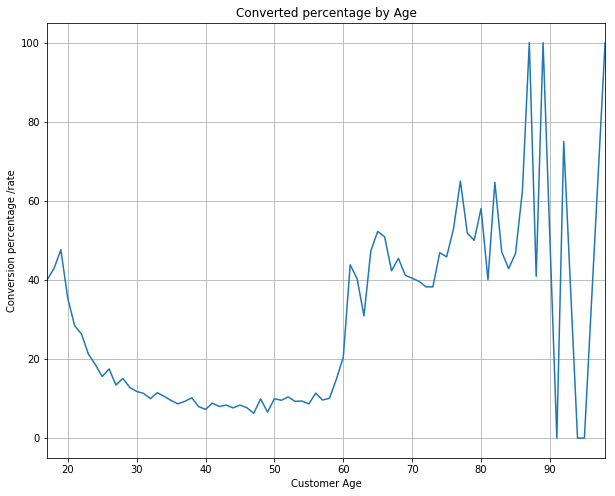

In [6]:
age_graph = total_convertion_by_age.plot(grid=True,figsize=(10,8),title='Converted percentage by Age')
age_graph.set_xlabel('Customer Age')
age_graph.set_ylabel('Conversion percentage /rate')

Graph for the above code looks like this,

Now let’s play with data by modifying and finding exciting things like age and marital status together

In [7]:
df['sepration_of_age_group'] = df['age'].apply(lambda x : '[18,30)'if x<30 else '[30,40)' if x<40 \
                                             else '[40,50)' if x <50 else '[50,60)' if x <60  \
                                              else '[60,70)'if x<70 else '70+'
)
sum_of_sepration_of_groups = df.groupby(by='sepration_of_age_group')['converted'].sum()
total_counts_of_sepration_of_age_group = df.groupby('sepration_of_age_group')['converted'].count()
seperated_by_age_group = (sum_of_sepration_of_groups/total_counts_of_sepration_of_age_group)*100
age_marital = df.groupby(['sepration_of_age_group','marital'])['converted'].sum().unstack('marital').fillna(0)
age_marital =age_marital.divide(df.groupby(by ='sepration_of_age_group')['converted'].count(),axis=0)
age_marital

marital,divorced,married,single,unknown
sepration_of_age_group,,,,
70+,0.136461,0.321962,0.012793,0.000000
"[18,30)",0.002117,0.027871,0.132475,0.000176
"[30,40)",0.007557,0.052958,0.040383,0.000354
"[40,50)",0.011970,0.054627,0.012350,0.000285
"[50,60)",0.017342,0.077674,0.006412,0.000146
"[60,70)",0.037293,0.301105,0.006906,0.001381


Now we will clean our dataset. I am removing columns which are not useful for us and code looks like this

In [8]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'converted',
       'sepration_of_age_group'],
      dtype='object')

In [9]:
df.drop(['day_of_week','campaign','sepration_of_age_group', 'pdays','previous', 'poutcome','emp.var.rate', 'cons.price.idx',
       'cons.conf.idx','euribor3m', 'nr.employed','default', 'converted','education'],axis=1, inplace=True)

In [10]:
df.dtypes

age          int64
job         object
marital     object
housing     object
loan        object
contact     object
month       object
duration     int64
y           object
dtype: object

Now we will let’s get into the core part of this blog by doing label encoding, and I will be doing label encoding for a few columns

In [11]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
df['marital'] =le.fit_transform(df['marital'])
df['job'] =le.fit_transform(df['job'])
df['housing'] =le.fit_transform(df['housing'])
df['loan'] =le.fit_transform(df['loan'])
df['contact'] =le.fit_transform(df['contact'])
df['month'] =le.fit_transform(df['month'])
df['y'] =le.fit_transform(df['y'])
df.head(10)

,age,job,marital,housing,loan,contact,month,duration,y
0,56,3,1,0,0,1,6,261,0
1,57,7,1,0,0,1,6,149,0
2,37,7,1,2,0,1,6,226,0
3,40,0,1,0,0,1,6,151,0
4,56,7,1,0,2,1,6,307,0
5,45,7,1,0,0,1,6,198,0
6,59,0,1,0,0,1,6,139,0
7,41,1,1,0,0,1,6,217,0
8,24,9,2,2,0,1,6,380,0
9,25,7,2,2,0,1,6,50,0


After understanding the data and duration, I will be adding another column named ds to make duration above 360 is 1, else 0 and deleting the duration.

In [12]:
df['ds'] = df['duration'].apply(lambda x :0 if x<360 else 1)
df.drop(['duration'],axis=1, inplace=True)
df.head(10)

,age,job,marital,housing,loan,contact,month,y,ds
0,56,3,1,0,0,1,6,0,0
1,57,7,1,0,0,1,6,0,0
2,37,7,1,2,0,1,6,0,0
3,40,0,1,0,0,1,6,0,0
4,56,7,1,0,2,1,6,0,0
5,45,7,1,0,0,1,6,0,0
6,59,0,1,0,0,1,6,0,0
7,41,1,1,0,0,1,6,0,0
8,24,9,2,2,0,1,6,0,1
9,25,7,2,2,0,1,6,0,0


Now we will be converting categorical to Dummies

In [13]:
cat_cols = ['job','marital','housing','loan','month','y','ds']
df =pd.get_dummies(df,columns=cat_cols,drop_first=True,)
df.head(10)

,age,contact,job_1,job_2,job_3,job_4,job_5,job_6,job_7,job_8,...,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,y_1,ds_1
0,56,1,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,57,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,37,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,40,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,56,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
5,45,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
6,59,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7,41,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8,24,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
9,25,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


Now dividing Testing and Training Dataset from the dataset,

In [14]:
X = df.copy().drop('y_1', axis=1)
Y = df['y_1']
trainX,testX,trainY,testY =train_test_split(X,Y,test_size =0.20)
print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(32950, 30)
(8238, 30)
(32950,)
(8238,)


# Scaling numeric features

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(trainX.iloc[:,:5])
trainX.iloc[:,:5] = scaler.transform(trainX.iloc[:,:5])
testX.iloc[:,:5] = scaler.transform(testX.iloc[:,:5])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int32, int64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int32, int64 were all converted to float64 by StandardScaler.
  """
C:

### Logistic regrassion 

In [16]:
X = trainX
Y =trainY
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(X,Y)
predicted_classes = model.predict(X)
accuracy = accuracy_score(Y,predicted_classes)
parameters = model.coef_
print(accuracy)
print(parameters)
print(model)

0.8904400606980273
[[ 0.04865866 -0.63761383 -0.23698295 -0.06413725 -0.01343249 -0.17223415
   0.47632382 -0.28814965 -0.46442617  0.66313539 -0.25513374  0.10433821
  -0.10772281  0.02009561  0.2624998  -0.06378101  0.02582274  0.0326268
   0.02582274 -0.06756478 -0.64903583  1.30189912 -0.91016345  0.29784801
   1.85881168 -0.72862179 -0.75557028  1.48909343  1.35553882  2.33488989]]
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [17]:
model.fit(testX, testY)
predicted_classes_test = model.predict(testX)
accuracy =accuracy_score(testY,predicted_classes_test)
print(accuracy)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8954843408594318


# Naive Bayes

In [18]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X, Y)
NB_train_pred = NB.predict(X)
print(accuracy_score(Y,NB_train_pred))

NB_test_pred = NB.predict(testX)
print(accuracy_score(testY, NB_test_pred))

0.8582701062215478
0.8612527312454479


# Decision Tree : At first we need to train/fit the model

In [19]:
from sklearn import tree
from sklearn.metrics import accuracy_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV
dtc = tree.DecisionTreeClassifier()
dtc.fit(trainX, trainY)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Get the prediction for Train and test and accuracy for for both of them

In [20]:
pred_train = dtc.predict(trainX)
pred_test = dtc.predict(testX)
print('Accuracy on train is :', accuracy_score(trainY,pred_train))
print("Accuracy on test is :", accuracy_score(testY,pred_test))

Accuracy on train is : 0.9610318664643399
Accuracy on test is : 0.8693857732459335


# Build the Decision Tree Model

In [21]:
# Decision tree with depth = 2
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=1, max_depth=2)
dtc.fit(trainX,trainY)


pred_train = dtc.predict(trainX)
pred_test = dtc.predict(testX)
print('Accuracy on train is :', accuracy_score(trainY,pred_train))
print("Accuracy on test is :", accuracy_score(testY,pred_test))

Accuracy on train is : 0.8870713201820941
Accuracy on test is : 0.888443797038116


In [22]:
# Decision tree with depth = 4
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=1, max_depth=4)
dtc.fit(trainX,trainY)


pred_train = dtc.predict(trainX)
pred_test = dtc.predict(testX)
print('Accuracy on train is :', accuracy_score(trainY,pred_train))
print("Accuracy on test is :", accuracy_score(testY,pred_test))

Accuracy on train is : 0.8905614567526555
Accuracy on test is : 0.8911143481427531


In [23]:
# Decision tree with depth = 8
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=1, max_depth=8,criterion='gini')
dtc.fit(trainX,trainY)


pred_train = dtc.predict(trainX)
pred_test = dtc.predict(testX)
print('Accuracy on train is :', accuracy_score(trainY,pred_train))
print("Accuracy on test is :", accuracy_score(testY,pred_test))

Accuracy on train is : 0.8983004552352049
Accuracy on test is : 0.8930565671279437


In [24]:
dtc = DecisionTreeClassifier(max_depth=8,criterion='entropy')
dtc.fit(trainX,trainY)
Y_Predict_dt = dtc.predict_proba(testX)[:,1]



In [25]:
plt.figure(figsize=(6,6))
dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

InvocationException: GraphViz's executables not found

<Figure size 432x432 with 0 Axes>

# Performance Metrics

In [ ]:
fpr_dt, tpr_dt, _ = roc_curve(testY, Y_Predict_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# SVM

We will be creating an svc object and after that fitting the model , training and testing.

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc = SVC()

svc.fit(trainX, trainY)
train_pred = svc.predict(trainX)
test_pred =svc.predict(testX)
print(accuracy_score(trainY,train_pred))
print(accuracy_score(testY,test_pred))

# Random Forest 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rfc = RandomForestClassifier()
rfc.fit(trainX, trainY)
rfc_train_pred = rfc.predict(trainX)
rfc_test_pred = rfc.predict(testX)
print(accuracy_score(trainY,rfc_train_pred))
print(accuracy_score(testY , rfc_test_pred))

# KNN

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier
# knn_classifier = KNeighborsClassifier(algorithm='brute',weights='distance')
# from sklearn.metrics import accuracy_score
# params = {'n_neighbors':[1,11,25],'metric':['euclidean','cityblock']}
# grid = GridSearchCV(knn_classifier,param_grid=params,scoring='accuracy',cv=10)

# grid.fit(trainX,trainY)
# best_knn = grid.best_estimator_
# train_pred = best_knn.predict(trainX)
# test_pred = best_knn.predict(testX)
# print("Accuracy on train is :",metrics.accuracy_score(trainY,train_pred))
# print("Accuracy on test is :",metrics.accuracy_score(testX,test_pred))

This is one of the effective ways to find who is willing to join new schemes and want to take the subscriptions put by banks.